Data Preprocessing & Cleaning 

This notebook: 
- Loads 3 raw datasets
- Inspects their structure
- Handles missing values
- Understands data types and performs basic cleaning. 

The cleaned outputs are saved to `data/processed/`.


In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from kaggle.api.kaggle_api_extended import KaggleApi

In [2]:
# Authorization with Kaggle API
api = KaggleApi()
api.authenticate()

# Defining paths
data_dir = os.path.join('..', 'data')
raw_dir = os.path.join(data_dir, 'raw')
processed_dir = os.path.join(data_dir, 'processed')

# If Folders exists code will continue without errors
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True) 

# Downloading datasets
datasets = {
    'jacopoferretti/superstore-dataset': 'superstore_dataset.csv',
    'kartikeybartwal/ecommerce-product-recommendation-collaborative': 'product_recommendation.csv',
    'uom190346a/e-commerce-customer-behavior-dataset': 'customer_behavior.csv'
}

for dataset in datasets:
    try:
        print(f"Downloading {dataset}...")
        api.dataset_download_files(dataset, path=raw_dir)
    except Exception as e:
        print(f"Error downloading {dataset}: {e}")
    
# Unpacking ZIP
for file in os.listdir(raw_dir):
    if file.endswith('.zip'):
        print(f"Unpacking - {file}...")
        with zipfile.ZipFile(os.path.join(raw_dir, file), 'r') as zip_ref:
            zip_ref.extractall(raw_dir)    
        os.remove(os.path.join(raw_dir, file)) # remove zip file

    
# Reading data with correct file mapping
try:
    # File name matching (must match real names in raw_dir)
    file_mapping = {
        'superstore': 'Sample - Superstore.csv',
        'customer_behavior': 'E-commerce Customer Behavior - Sheet1.csv',
        'product_recommendation': 'user_personalized_features.csv'
    }
    df_superstore = pd.read_csv(os.path.join(raw_dir, file_mapping['superstore']), encoding='ISO-8859-1')
    df_customer_behavior = pd.read_csv(os.path.join(raw_dir, file_mapping['customer_behavior']), encoding='ISO-8859-1')
    df_product_recommendation = pd.read_csv(os.path.join(raw_dir, file_mapping['product_recommendation']), encoding='ISO-8859-1')
    
except FileNotFoundError as e:
    print(f"Error while reading files: {e}")   

# Checking files in raw_dir
print("Files in raw_dir:", os.listdir(raw_dir))

# Delete .DS_Store if exists (utility file is automatically created by the macOS)
if '.DS_Store' in os.listdir(raw_dir):
    os.remove(os.path.join(raw_dir, '.DS_Store')) 

Dataset URL: https://www.kaggle.com/datasets/jacopoferretti/superstore-dataset
Dataset URL: https://www.kaggle.com/datasets/kartikeybartwal/ecommerce-product-recommendation-collaborative
Dataset URL: https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset
Unpacking - e-commerce-customer-behavior-dataset.zip...
Unpacking - superstore-dataset.zip...
Unpacking - ecommerce-product-recommendation-collaborative.zip...
Files in raw_dir: ['E-commerce Customer Behavior - Sheet1.csv', 'Sample - Superstore.csv', 'user_personalized_features.csv']


Basic EDA for 3 datasets

In [8]:
# Overview function for dataset summary information
def overview(df, name):
    print(f"\n--- Overview for {name} ---") # dataset name header
    display(df.head(3))
    
    print("\nData structure information:") 
    df.info()
    
    print("\nMissing values:")
    print((df.isna().mean() * 100).sort_values(ascending=False).head(10))
    print("-" * 50)

# Datasets dictionary !!!!   --- КАК СДЕЛАТЬ МЕНЕЕ ЗАХАРДКОЖЕНО??
datasets = {
    "Superstore": df_superstore,
    "Product Recommendations": df_product_recommendation,
    "E-commerce Customer Behavior": df_customer_behavior
}
print("\nStarting exploratory data analysis...")

# Iteration goes through all datasets from datasets dictionary & for each one it applies the overview() function
for name, df in datasets.items():
    overview(df, name)



Starting exploratory data analysis...

--- Overview for Superstore ---


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714



Data structure information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non

,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True



Data structure information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   User_ID                      1000 non-null   object
 2   Age                          1000 non-null   int64 
 3   Gender                       1000 non-null   object
 4   Location                     1000 non-null   object
 5   Income                       1000 non-null   int64 
 6   Interests                    1000 non-null   object
 7   Last_Login_Days_Ago          1000 non-null   int64 
 8   Purchase_Frequency           1000 non-null   int64 
 9   Average_Order_Value          1000 non-null   int64 
 10  Total_Spending               1000 non-null   int64 
 11  Product_Category_Preference  1000 non-null   object
 12  Time_Spent_on_Site_Minutes   1000 non-null   int64 
 13  Pages

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied



Data structure information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB

Missing values:
Satisfaction Level    0.571429
Customer ID           0.000000


Functions

In [ ]:
#--- def handle_missing_impute function ---
def handle_missing_impute(
    df: pd.DataFrame,
    num_thresh: float = 0.5,
    cat_thresh: float = 0.4,
    figsize: tuple = (6, 3),
    return_df: bool = True
) -> pd.DataFrame:

    df_proc = df.copy() if return_df else df

    # --- визуализация до ---
    missing = df_proc.isna().mean()
    plt.figure(figsize=figsize)
    sns.barplot(x=missing.index, y=missing.values)
    plt.xticks(rotation=90)
    plt.title("Missing Ratio Before Impute")
    plt.show()

    # --- удаление/импутация ---
    num_cols = df_proc.select_dtypes('number').columns.tolist()
    cat_cols = df_proc.select_dtypes('object').columns.tolist()

    to_drop = [
        c for c, r in missing.items()
        if (c in num_cols and r > num_thresh) or
           (c in cat_cols and r > cat_thresh)
    ]
    if to_drop:
        df_proc = df_proc.drop(columns=to_drop)
        print("Dropped columns:", to_drop)

    for c in num_cols:
        if c in df_proc and df_proc[c].isna().any():
            med = df_proc[c].median()
            df_proc[c].fillna(med, inplace=True)
    for c in cat_cols:
        if c in df_proc and df_proc[c].isna().any():
            mode = df_proc[c].mode(dropna=True)[0]
            df_proc[c].fillna(mode, inplace=True)

    # --- визуализация после ---
    missing_after = df_proc.isna().mean()
    plt.figure(figsize=figsize)
    sns.barplot(x=missing_after.index, y=missing_after.values)
    plt.xticks(rotation=90)
    plt.title("Missing Ratio After Impute")
    plt.show()

    return df_proc if return_df else None

# --- def handle_handle_outliers function ---
def handle_outliers(
    df: pd.DataFrame,
    num_cols: list = None,
    figsize: tuple = (12, 6),
    return_df: bool = True
) -> pd.DataFrame:
 
    df_proc = df.copy() if return_df else df
    
    if num_cols is None:
        num_cols = df_proc.select_dtypes(include='number').columns.tolist()
        
# Boxplots
    n = len(num_cols)
    ncols = 2
    nrows = (n + 1) // 2

    # Before handlin
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    for ax, col in zip(axes, num_cols):
        sns.boxplot(x=df_proc[col], ax=ax)
        ax.set_title(f"{col} — Before")   
    for ax in axes[n:]:
        fig.delaxes(ax)
    plt.tight_layout()
    plt.show()
    
    for col in num_cols:
        # Расчет границ
        Q1 = df_proc[col].quantile(0.25)
        Q3 = df_proc[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        
        # Обрезка и заполнение
        med = df_proc[col].median()
        df_proc[col] = df_proc[col].clip(lower, upper).fillna(med)
    

    # After handling
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    for ax, col in zip(axes, num_cols):
        sns.boxplot(x=df_proc[col], ax=ax)
        ax.set_title(f"{col} — After")
    for ax in axes[n:]:
        fig.delaxes(ax)
    plt.tight_layout()
    plt.show()
    
    return df_proc if return_df else None


# --- def analyze_skew_kurtosis function ---
    # skew ≈ 0 - the attribute is symmetrical
    # |skew| < 1 - moderately asymmetrical
    # kurtosis ≈ 3 - close to normal distribution
def analyze_skew_kurtosis(
    df: pd.DataFrame,
    num_cols: list = None,
    figsize: tuple = (6, 3)
) -> None:

    df_proc = df.copy()
    
    if num_cols is None:
        num_cols = df_proc.select_dtypes(include='number').columns.tolist()

    stats = []
    for col in num_cols:
        s = skew(df_proc[col].dropna())
        k = kurtosis(df_proc[col].dropna(), fisher=True)
        stats.append((col, s, k))
        
    # Визуализация гистограмм
    for col, s, k in stats:
        plt.figure(figsize=figsize)
        sns.histplot(df_proc[col], kde=True)
        plt.title(f"{col}\nskew={s:.2f}, kurtosis={k:.2f}")
        plt.tight_layout()
        plt.show()

    # Stat table
    stats_df = pd.DataFrame(stats, columns=['feature', 'skewness', 'kurtosis'])
    display(stats_df.sort_values('skewness', key=lambda x: x.abs(), ascending=False))




Preprocessing & EDA for df_superstore

Size of dataframe in the beginning: (9994, 21)
sales       0
quantity    0
discount    0
profit      0
dtype: int64


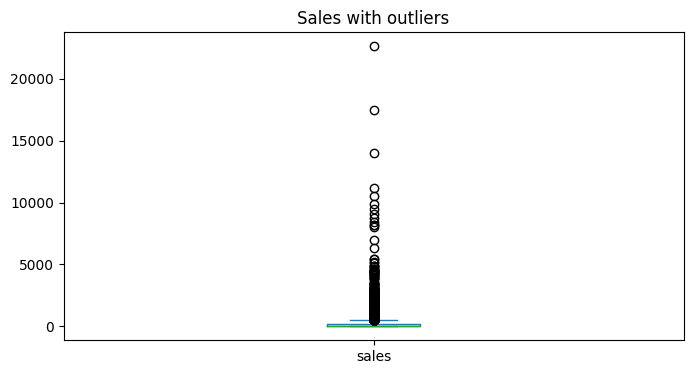

/var/folders/qs/8x_tgvhs2qz3v8_4kxk796800000gn/T/ipykernel_70308/623619259.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(col_median, inplace=True)
/var/folders/qs/8x_tgvhs2qz3v8_4kxk796800000gn/T/ipykernel_70308/623619259.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

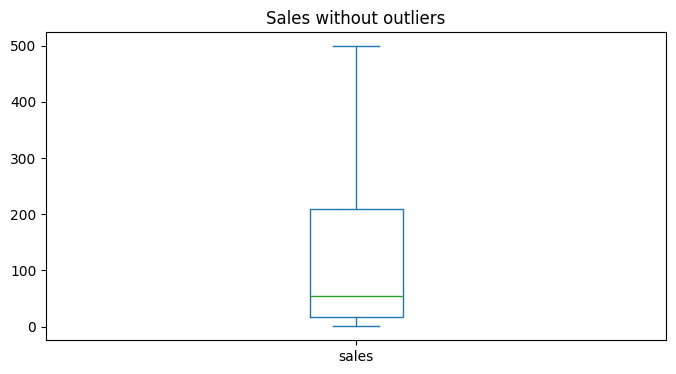

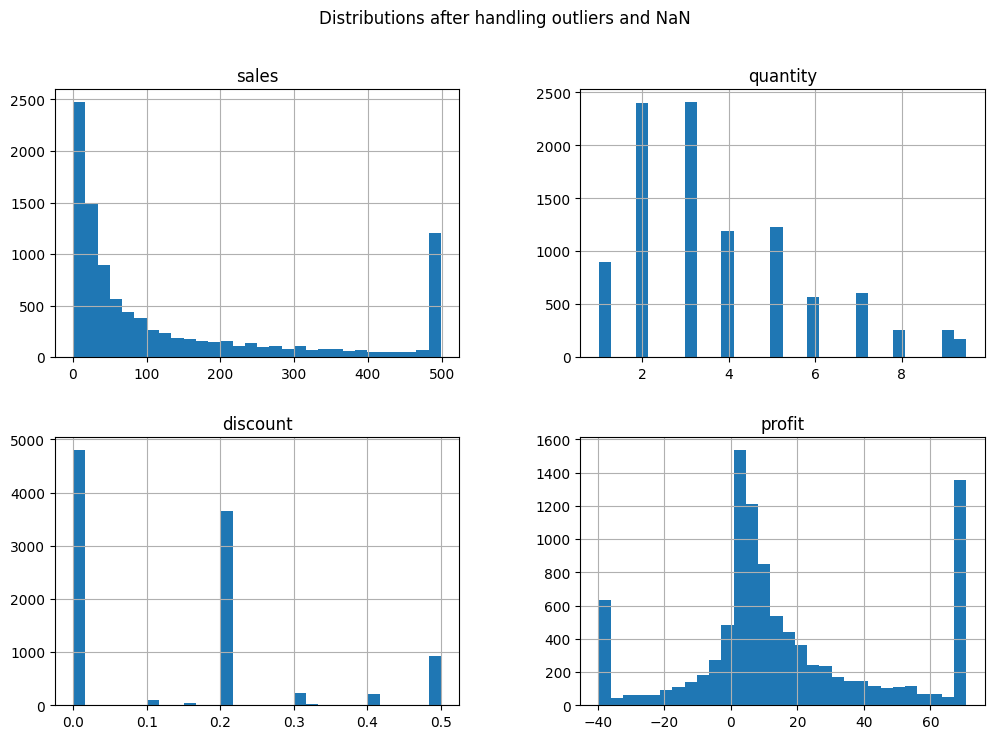

Files in processed: ['product_recommendation_clean.csv', 'superstore_clean.csv']


In [ ]:

def preprocess_superstore(df):
    print(f"Size of dataframe in the beginning: {df.shape}")
    
    df = df.copy()
    
# Renaming and deleting uninformative columns

    removed_columns = []
    # Renaming
    df.columns = [x.lower().replace(' ', '_').strip() for x in df.columns]
    
    # Deleting
    low_value_columns = ['row_id', 'country', 'customer_name', 'postal_code']
    for col in low_value_columns:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)
            removed_columns.append(col)
            
    print(f"Dropped columns: {removed_columns}")
    print(f"Shape after column drop: {df.shape}")
    
# Parse dates
    date_cols = ['order_date', 'ship_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Deleting rows with invalid dates
    df.dropna(subset=date_cols, inplace=True)
    # Removing incorrect: ship_date before order_date
    df = df[df['ship_date'] >= df['order_date']].copy()

# Basic Feature engineering

    # Calculation of delivery_days and average speed by ship_mode
    df['delivery_days'] = (df['ship_date'] - df['order_date']).dt.days
    df['avg_delivery_days'] = df.groupby('ship_mode')['delivery_days'].transform('mean')


# Filter logical errors and create flags

    df = df[(df['quantity'] > 0) & (df['sales'] >= 0)]
    df['is_unprofitable'] = (df['profit'] <= 0).astype(int)
    print(f"Shape after filters: {df.shape}")    

    
# By "Basic EDA for 3 datasets": there is no missing values

# Numeric columns for cleaning
    num_cols = ['sales', 'quantity', 'discount', 'profit']
    print(df[num_cols].isna().sum())
    
    # Skewness and kurtosis
    print("[Skew/Kurtosis before outliers]")
    analyze_skew_kurtosis(df)
    
    # def handle_handle_outliers function 
    df = handle_outliers(df, num_cols=None, return_df=True)
    print(f"[After outlier handling] Shape: {df.shape}")

# Categorical EDA
    for col in df.select_dtypes(include='object'):
        plt.figure(figsize=(4, 2))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(col)
        plt.tight_layout()
        plt.show()

    df.to_csv(os.path.join(processed_dir, 'superstore_clean.csv'), index=False)
    return df

df_superstore_clean = preprocess_superstore(df_superstore)

print("Files in processed:", os.listdir(processed_dir))

Pipeline for preprocessing pdf_product_recommendation:
1) Rename columns
2) Feature engineering
3) Skew/kurtosis analysis + tabular output
5) Outlier handling (IQR) via handle_outliers.
6) EDA of numerical histograms by group
7) EDA of categorical via value_counts
8) Saving

Size of dataframe in the beginning: (1000, 15)


,skew,kurtosis
feature,,
age,-0.046813,-1.150721
income,0.098360,-1.179385
purchase_frequency,-0.035460,-1.188676
average_order_value,0.031376,-1.152031
total_spending,0.003124,-1.248406
time_spent_on_site_minutes,0.024315,-1.237280
pages_viewed,0.037532,-1.197357


age: missing=0
income: missing=0
purchase_frequency: missing=0
average_order_value: missing=0
total_spending: missing=0
time_spent_on_site_minutes: missing=0
pages_viewed: missing=0


,gender,location,interests,product_category_preference,newsletter_subscription
Male,0.526,0.000,0.000,0.000,0.000
Female,0.474,0.000,0.000,0.000,0.000
Suburban,0.000,0.349,0.000,0.000,0.000
Urban,0.000,0.344,0.000,0.000,0.000
Rural,0.000,0.307,0.000,0.000,0.000
Sports,0.000,0.000,0.213,0.000,0.000
Fashion,0.000,0.000,0.209,0.000,0.000
Travel,0.000,0.000,0.196,0.000,0.000
Food,0.000,0.000,0.196,0.000,0.000
Technology,0.000,0.000,0.186,0.000,0.000



Missing values after preprocessing:
 age                           0
income                        0
purchase_frequency            0
average_order_value           0
total_spending                0
time_spent_on_site_minutes    0
pages_viewed                  0
dtype: int64
Files in processed: ['product_recommendation_clean.csv', 'superstore_clean.csv']


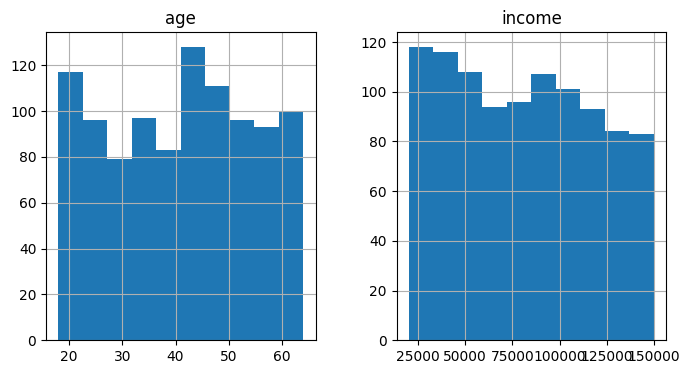

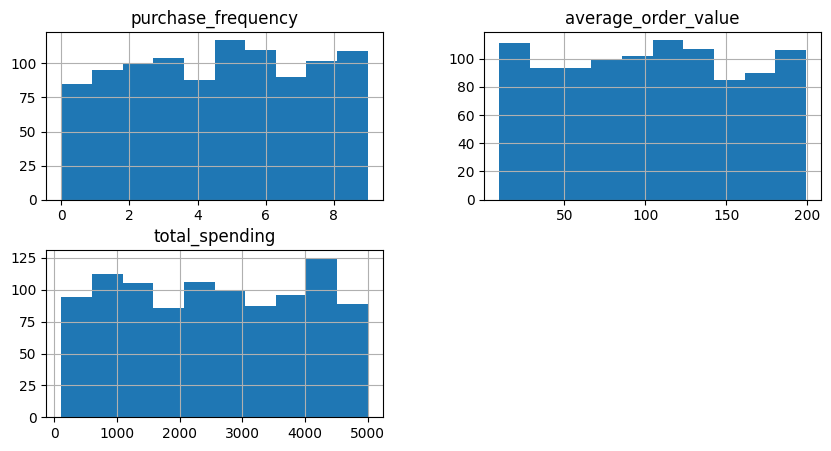

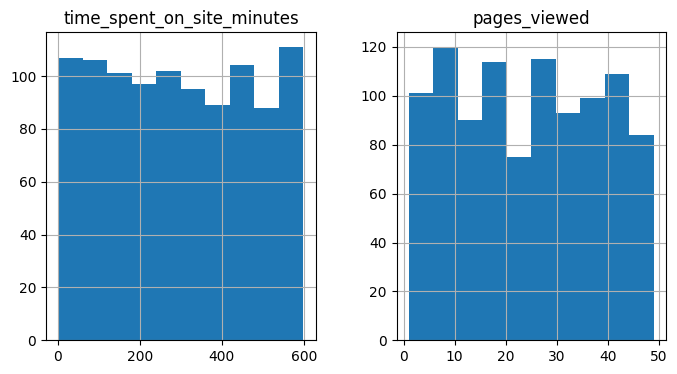

In [ ]:

def preprocess_product_recommendation(df):
    print(f"Size of dataframe in the beginning: {df.shape}")
    
    df = df.copy()
    
# Renaming
    df.columns = [x.lower().replace(' ', '_').strip() for x in df.columns]
    
# Basic Feature engineering
    
    # Segmentation by last login
    bins = [0, 4, 16, 23, np.inf]  # 10%, 50%, 75%
    labels = ['high_activity', 'medium', 'low', 'churn_risk']
    
    # 10% of the most active located to separate group
    # Threshold for "risk of leaving" = 23 days 75. percentile
    df['login_recency'] = pd.cut(df['last_login_days_ago'], bins=bins, labels=labels)
    df['login_recency_encoded'] = df['login_recency'].cat.codes

  
    # Activity score - more purchases and fewer days since last entry (higher activity)
    df['activity_score'] = df['purchase_frequency'] / (df['last_login_days_ago'] + 1)
    
    # Risk of outflow - haven't visited for a long time but used to be active
    #df['churn_risk'] = ((df['last_login_days_ago'] > 30) & (df['purchase_frequency'] > 2)).astype(int)
    
    # Deleting original column
    df.drop(columns=['last_login_days_ago'], inplace=True)
    print(f"After feature engineering: {df.shape}")
    
# Skew/Kurtosis
    num_cols = df.select_dtypes(include='number').columns.tolist()


    print("[Skew/Kurtosis before outliers]")
    analyze_skew_kurtosis(df)
    
# By "Basic EDA for 3 datasets": there is no missing values

# def handle_handle_outliers function   
    df = handle_outliers(df, num_cols=None, return_df=True)
    print(f"After outlier handling: {df.shape}")

# Histograms of numeric by group
    groups = {
        'demography': ['age', 'income'],
        'behavior': ['purchase_frequency','average_order_value','total_spending'],
        'website': ['time_spent_on_site_minutes','pages_viewed']
    }
    for title, cols in groups.items():
        valid = [c for c in cols if c in df]
        if not valid: continue
        df[valid].hist(figsize=(8,4))
        plt.suptitle(title.capitalize())
        plt.show()
    
# Categorical EDA
    for col in df.select_dtypes('object'):
        plt.figure(figsize=(4,2))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(col)
        plt.tight_layout()
        plt.show()
    
    # Fill NaN with zeros
    all_vc = pd.concat(vc_list, axis=1).fillna(0)
    display(all_vc)

    
    print("\nMissing values after preprocessing:\n", df[num_cols].isna().sum())
    
    df.to_csv(os.path.join(processed_dir, 'product_recommendation_clean.csv'), index=False)
    return df

df_product_recommendation_clean = preprocess_product_recommendation(df_product_recommendation)
print("Files in processed:", os.listdir(processed_dir))

Pipelines for preprocessing and EDA of f_customer_behavior:
1) Renaming columns
2) Feature engineering - new numeric columns
3) Skew/kurtosis analysis with histograms
4) Skip filling
5) Outliers handling by IQR
6) EDA by categorical: countplots
7) Saving to CSV and returning a clean DataFrame

Size of dataframe in the beginning: (350, 14)
After rename & drop: (350, 14)
Numeric columns: ['customer_id', 'age', 'total_spend', 'items_purchased', 'average_rating', 'days_since_last_purchase', 'spend_per_item', 'rating_per_dollar', 'recency_rate']
After feature engineering: (350, 14)


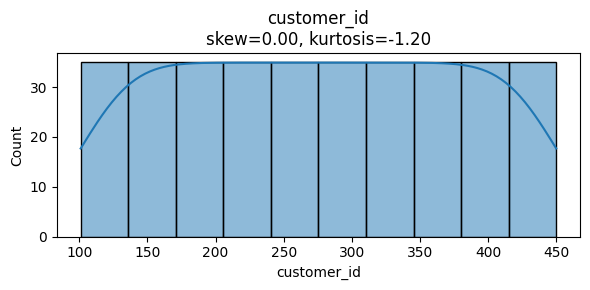

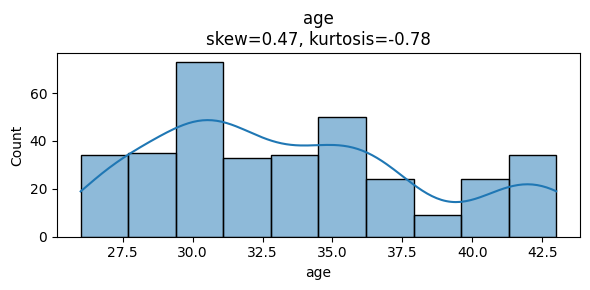

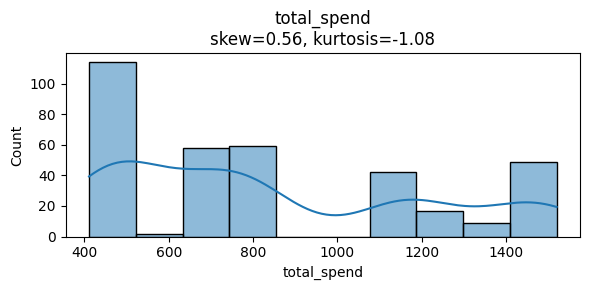

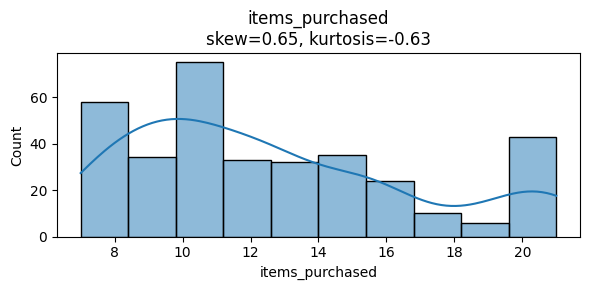

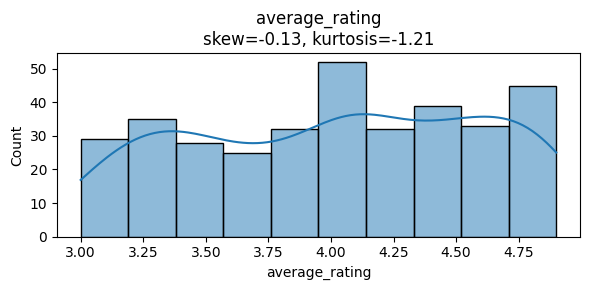

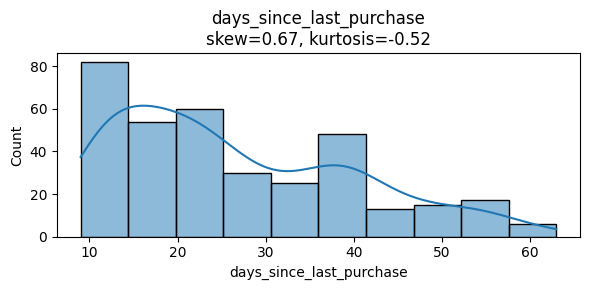

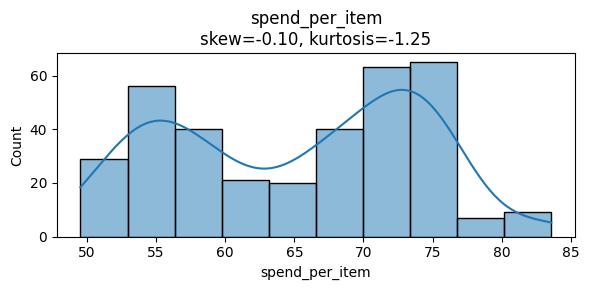

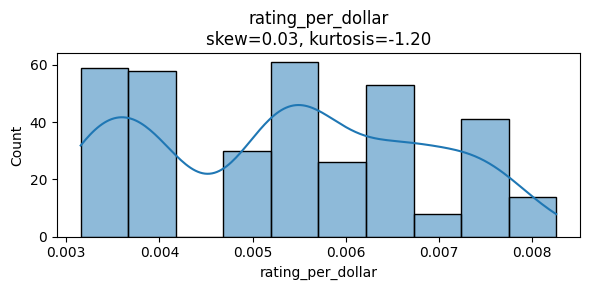

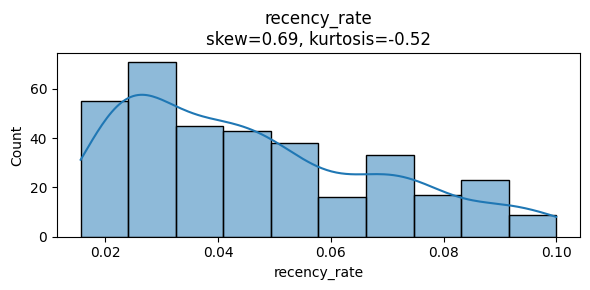

,feature,skewness,kurtosis
8,recency_rate,0.686086,-0.524572
5,days_since_last_purchase,0.674638,-0.515304
3,items_purchased,0.646374,-0.630383
2,total_spend,0.560153,-1.081590
1,age,0.466331,-0.778875
4,average_rating,-0.126276,-1.210844
6,spend_per_item,-0.104514,-1.246475
7,rating_per_dollar,0.029922,-1.195115
0,customer_id,0.000000,-1.200020


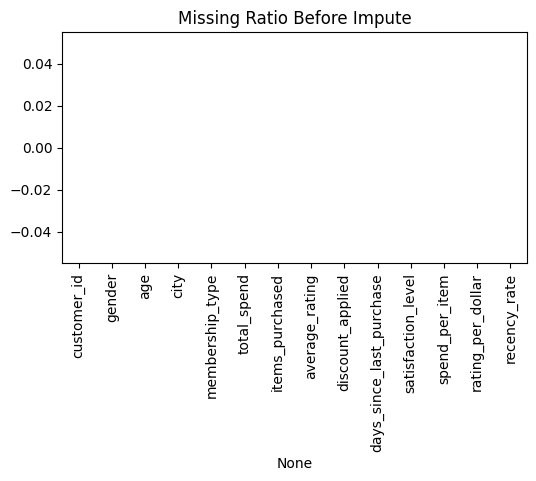

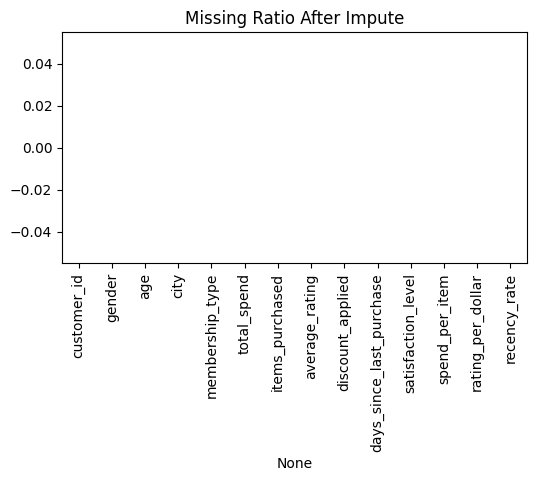

[After missing impute] Shape: (350, 14)


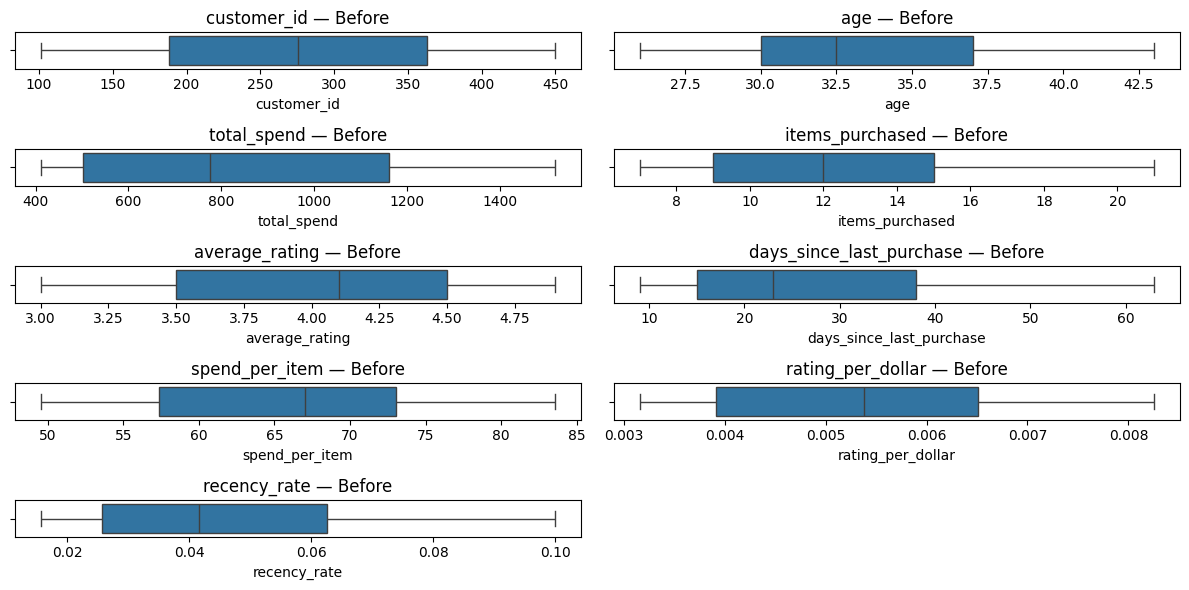

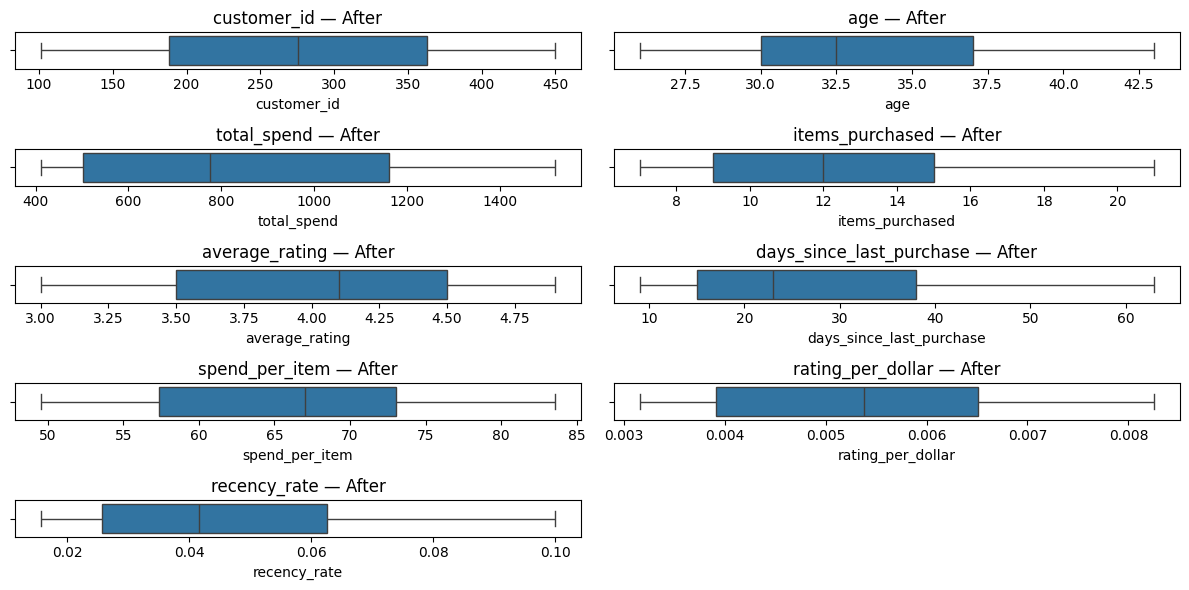

[After outlier handling] Shape: (350, 14)


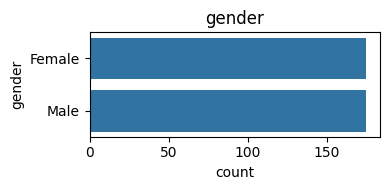

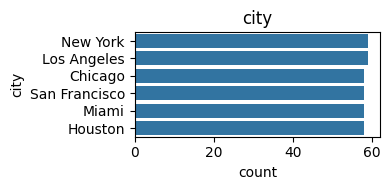

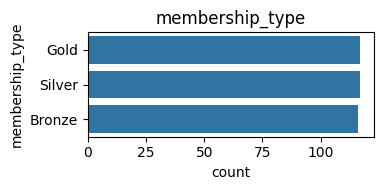

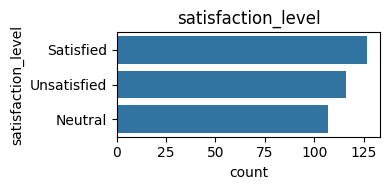

Files in processed: ['product_recommendation_clean.csv', 'customer_behavior_clean.csv', 'superstore_clean.csv']


In [ ]:
def preprocess_customer_behavior(df):
    print(f"Size of dataframe in the beginning: {df.shape}")
        
    df = df.copy()
    
# Renaming and deleting uninformative columns
    df.columns = [x.lower().replace(' ', '_').strip() for x in df.columns]
    print(f"After rename & drop: {df.shape}")
    
# Basic Feature engineering
    num_cols = df.select_dtypes(include='number').columns.tolist()
    print("Numeric columns:", num_cols)
    
    # spend_per_item  = total_spend / items_purchased
    # rating_per_dollar = average_rating  / (total_spend + 1)
    # recency_rate = 1 / (days_since_last_purchase + 1)
    df['spend_per_item']      = df['total_spend'] / df['items_purchased']
    df['rating_per_dollar']   = df['average_rating'] / (df['total_spend'] + 1)
    df['recency_rate']        = 1 / (df['days_since_last_purchase'] + 1)
    print(f"After feature engineering: {df.shape}")
    
# Skew/Kurtosis + histograms
    num_cols = df.select_dtypes(include='number').columns.tolist()

    # Calculating metrics and visualizing
    stats = []
    for col in num_cols:
        s = skew(df[col].dropna())
        k = kurtosis(df[col].dropna(), fisher=True)
        stats.append((col, s, k))
        
    # Histograms with skew/kurtosis annotation
    for col, s, k in stats:
        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], kde=True)
        plt.title(f"{col}\nskew={s:.2f}, kurtosis={k:.2f}")
        plt.tight_layout()
        plt.show()

    stats_df = pd.DataFrame(stats, columns=['feature', 'skewness', 'kurtosis'])
    display(stats_df.sort_values('skewness', key=lambda x: x.abs(), ascending=False))
    
# def handle_missing_impute function     
    df = handle_missing_impute(df, num_thresh=0.4, cat_thresh=0.4)
    print(f"After missing impute: {df.shape}")  
    
# def handle_handle_outliers function      
    df = handle_outliers(df, num_cols=None)
    print(f"After outlier handling: {df.shape}")
      
# Categorical EDA
    for col in df.select_dtypes('object'):
        plt.figure(figsize=(4,2))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(col)
        plt.tight_layout()
        plt.show()
    
    df.to_csv(os.path.join(processed_dir, 'customer_behavior_clean.csv'), index=False)
    
    return df

df_customer_behavior = preprocess_customer_behavior(df_customer_behavior)
print("Files in processed:", os.listdir(processed_dir))

# TO DO: Standard Scaler before clustering